Here `make_regular_graph` initially generates a graph with $n$ nodes and each node having $k$ neighbors. `rewire` here, which is a modification of the one given in the textbook, creates a new edge with new start and end nodes when `flip(p)` is true, otherwise it makes no modifications to the edges.

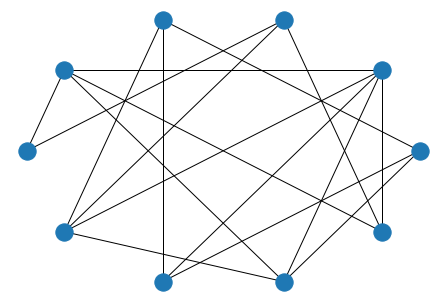

In [72]:
import networkx as nx
import numpy as np

"""Same flip function found in chapter 2"""
def flip(p):
    return np.random.random() < p

import networkx as nx

"""Same graph generator as in exercise 3.1"""
def adjacent_edges(nodes, k):
    n = len(nodes)
    
    if k%2 != 0 and n%2 != 0:                                   # Checks if n is odd and k is odd
        raise ValueError('k cannot be odd when n is odd')       # Raises the value error
    
    else:
        if k % 2 == 0:                                          # This part is similar to the one in the book
            k = k//2
            for i in range(n):
                for j in range(i+1, i+k+1):
                    yield nodes[i],nodes[j%n]                   # Except that it uses the actual values of the nodes
                
        else:                                                   # Runs this part if k is odd
            k = k-1                                             # Turns odd k into even k and repeats the above code
            k = k // 2
            for i in range(n):
                for j in range(i+1-k, i+k+1):
                    yield nodes[i],nodes[j%n]
                
                yield nodes[i],nodes[(i+n//2)%n]                # This adds an edge to the opposite node

def make_regular_graph(node, k=2):
    G = nx.Graph()                                              # Creates the initial graph G
    
    G.add_nodes_from(range(node))
    G.add_edges_from(adjacent_edges(range(node),k))             # Runs the adjacent_edges function
    
    return G

"""This creates a new edge with new start and end nodes"""
def rewire(G, p):
    nodes = set(G)
    
    for u, v in G.edges():
        if flip(p):
            choices = nodes - {u} - set(G[u])
            new_v = np.random.choice(list(choices))
            choices = choices - {new_v}
            new_u = np.random.choice(list(choices))
            G.remove_edge(u, v)
            G.add_edge(new_u, new_v)
            
"""Use this to create a graph with rewiring"""
def graph_gen(n, k=2, p=1):
    g = make_regular_graph(n, k)
        
    rewire(g, p)
    
    return g

nx.draw_circular(graph_gen(10,3,1))

The following functions are from chapter 3 in the textbook and are here only for testing purposes. These were modified only for debugging and readability purposes.

In [52]:
def node_clustering(G, u):
    
    neighbors = G[u]
    k = len(neighbors)
    if k < 2:
        return np.nan                     # This error pops up for low values of n and k
        
    possible = k * (k-1) / 2
    exist = 0    
    for v, w in all_pairs(neighbors):
        if G.has_edge(v, w):
            exist +=1
    return exist / possible

def all_pairs(nodes):
    for i, u in enumerate(nodes):
        for j, v in enumerate(nodes):
            if i < j:
                yield u, v
                
def clustering_coefficient(G):
    cu = [node_clustering(G, node) for node in G]
    return np.nanmean(cu)

def path_lengths(G):
    length_iter = nx.shortest_path_length(G)
    for source, dist_map in length_iter:
        for dest, dist in dist_map.items():
            yield dist
            
def characteristic_path_length(G):
    return np.mean(list(path_lengths(G)))

def run_one_graph(n, k, p):
    """This is a modification of the function given in chapter 3. This uses graph_gen instead of
    WS graph as defined in the textbook"""
    ws = graph_gen(n, k, p)    
    mpl = characteristic_path_length(ws)
    cc = clustering_coefficient(ws)
    print(mpl, cc)
    return mpl, cc

In [53]:
%timeit run_one_graph(1000, 10, .5)

3.376524 0.09418236848577405
3.364674 0.08809705467391225
3.37282 0.09336132996690272
3.370998 0.09144419688498635
3.376268 0.09726626144753078
3.383126 0.10040024324660547
3.37489 0.09557745832598775
3.372672 0.09613959012263965
4.72 s ± 19.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [54]:
ps = np.logspace(-3, 0, 9)

def run_experiment(ps, n=1000, k=10, iters=5):
    
    res = []
    for p in ps:
        print(p)
        t = [run_one_graph(n, k, p) for _ in range(iters)]
        means = np.array(t).mean(axis=0)
        print(means)
        res.append(means)
    return np.array(res)

In [55]:
"""This takes a long time to run, use sparingly. This is mainly because of how gen_graph is defined which
checks list values a lot of times. However for low values of n and k this will generate a lot of
nan errors (see node_clustering above)"""

"""Wall time: 37 mins, 31s for (ps, 1000, 100, 10)"""

%time res = run_experiment(ps, 1000, 100, 10)

0.001
2.963442 0.7406650924426761
2.995856 0.7405139611331216
2.952218 0.7404905073053065
2.939964 0.7405460873914521
3.106832 0.7412505573553357
3.025274 0.7407623678388879
2.931936 0.740445614356469
2.989724 0.7409780054697341
2.834504 0.7399580605892337
2.99776 0.7406611336789054
[2.973751   0.74062714]
0.0023713737056616554
2.698472 0.7378841866361644
2.780024 0.7383720820345695
2.715294 0.737650606252826
2.720774 0.7374560948045894
2.704616 0.73767601648458
2.680906 0.7370074426055286
2.758524 0.7382414105327741
2.695708 0.7371471972768661
2.740808 0.7384425528569664
2.695292 0.7375831131944935
[2.7190418  0.73774607]
0.005623413251903491
2.609392 0.730148350497075
2.60484 0.7303237056423216
2.629844 0.7332610401828665
2.624874 0.7317530880121786
2.616532 0.7318830858770092
2.610894 0.7313489070566372
2.614122 0.7314471747626591
2.606706 0.7306708144326302
2.613262 0.7311562467188634
2.609814 0.7307164462142188
[2.614028   0.73127089]
0.01333521432163324
2.499252 0.714357701874354

In [56]:
L, C = np.transpose(res)
L /= L[0]
C /= C[0]

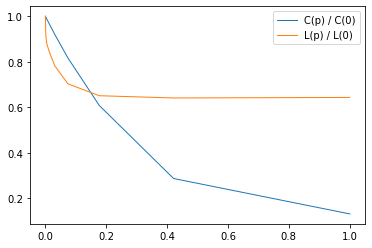

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns
#import util

#plt.plot(ps, C, 's-', linewidth=1, label='C(p) / C(0)')
#plt.plot(ps, L, 'o-', linewidth=1, label='L(p) / L(0)')
#plt.label()
sns.lineplot(ps, C, linewidth=1, label='C(p) / C(0)')
sns.lineplot(ps, L, linewidth=1, label='L(p) / L(0)')
#decorate(xlabel='Rewiring probability (p)', xscale='log',
         #title='Normalized clustering coefficient and path length',
         #xlim=[0.00009, 1.1], ylim=[-0.01, 1.01])
plt.show()

It can be seen here that the characteristic path length $L$ follows the same result as in the WS experiment. However for clusttering coefficient $C$, this quickly decreases in value up (note that for $p=0$ the graph is a regular graph) until it reaches a constant value $C_0$ which is around ~0.65. This is definitely due to how the function `rewired` was defined and shows that using this version of `rewired`, the resulting graph with $p=1$ has a low path length but relatively high clustering, such that it has features of both a regular graph and a random graph.